# Impact of automation on jobs by states (US states)
 

### Major Findings:
* Based on the analysis done on number of jobs impacted, we can see that California and Texas are potentially highly impacted due to automation. This means that in coming years we may see lot of layoffs in these states. These states offer maximum employment as of today compared to any other states in the US.
* Based on the analysis done on highly impacted Job types (Pie chart), we can notice that even among high impacted jobs there are certain job types (example, security guards) that have very high potential of being automated. These are mostly low skilled jobs that can be easily replaced by machines.
* Based on analysis done on low impacted Job types (bar chart), we can notice that jobs that have high skill requirement (example, therapists) and are not repetitive in nature have low chances of getting impacted by automation.

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## This is a new library imported to plot US maps as we will see later in this notebook.
import plotly.express as px

## Sourcing the data and processing

In [2]:
# Store file paths in a variable
State_file = Path("Resources/Occupational_Employment_State_2022.xlsx")
automation_file = Path("Resources/automation_data_by_state.csv")
states_file = Path("Resources/states.csv")

In [3]:
# Read the files into dataframes
Occupational_State_df = pd.read_excel(State_file)
automation_data = pd.read_csv(automation_file, encoding="ISO-8859-1")
state_codes_df = pd.read_csv(states_file, encoding="ISO-8859-1")

In [38]:
Occupational_State_df.head()

,AREA,AREA_TITLE,NAICS,NAICS_TITLE,I_GROUP,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,Alabama,11,"Agriculture, Forestry, Fishing and Hunting",sector,00-0000,All Occupations,total,5800,0.1,...,19.75,24.3,32.61,23270,29960,41080,50540,67820,NaN,NaN
1,1,Alabama,11,"Agriculture, Forestry, Fishing and Hunting",sector,11-0000,Management Occupations,major,**,**,...,48.59,61,67.44,52390,67960,101060,126880,140270,NaN,NaN
2,1,Alabama,11,"Agriculture, Forestry, Fishing and Hunting",sector,11-1021,General and Operations Managers,detailed,150,14.3,...,48.63,61,64.78,49400,67950,101140,126880,134730,NaN,NaN
3,1,Alabama,11,"Agriculture, Forestry, Fishing and Hunting",sector,13-0000,Business and Financial Operations Occupations,major,70,43.2,...,32.85,36.05,38.23,30880,48880,68330,74980,79520,NaN,NaN
4,1,Alabama,11,"Agriculture, Forestry, Fishing and Hunting",sector,13-1020,Buyers and Purchasing Agents,detailed,**,**,...,36.05,36.05,38.23,29120,48880,74980,74980,79520,NaN,NaN


In [39]:
# Select the required columns-'AREA_TITLE', 'OCC_CODE', 'OCC_TITLE' 'TOT_EMP'
state_filter_data = Occupational_State_df[['AREA_TITLE','OCC_CODE', 'OCC_TITLE', 'TOT_EMP']]

# Rename the columns
state_filter_data.rename(columns={'AREA_TITLE': 'State Name','OCC_CODE':'2022 National Employment Matrix code',
                                  'OCC_TITLE' : '2022 National Employment Matrix title',
                                  'TOT_EMP': 'Total Jobs'}, inplace=True)

# Cleaning data by removing empty fields
state_filter_data_cleaned = state_filter_data[state_filter_data['Total Jobs'] != '**']
state_filter_data_cleaned.head()

/var/folders/qw/b7yd_mld1pz2xv1xy035n6cm0000gn/T/ipykernel_62199/3885323842.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State Name,2022 National Employment Matrix code,2022 National Employment Matrix title,Total Jobs
0,Alabama,00-0000,All Occupations,5800
2,Alabama,11-1021,General and Operations Managers,150
3,Alabama,13-0000,Business and Financial Operations Occupations,70
5,Alabama,19-0000,"Life, Physical, and Social Science Occupations",60
6,Alabama,19-1032,Foresters,50


In [40]:
# finding total jobs per state and per Occupation
total_jobs_state_data = state_filter_data_cleaned.groupby(['State Name',
                                                         '2022 National Employment Matrix code',
                                                         '2022 National Employment Matrix title'])['Total Jobs'].sum()
total_jobs_state_df = pd.DataFrame(total_jobs_state_data).reset_index()
total_jobs_state_df.rename(columns={'Total Jobs':'Total Jobs'}, inplace=True)
total_jobs_state_df.head()


,State Name,2022 National Employment Matrix code,2022 National Employment Matrix title,Total Jobs
0,Alabama,00-0000,All Occupations,6267830
1,Alabama,11-0000,Management Occupations,325290
2,Alabama,11-1011,Chief Executives,1400
3,Alabama,11-1021,General and Operations Managers,115870
4,Alabama,11-1031,Legislators,2790


In [41]:
# Merging total_jobs_state_df with state_codes_df
total_jobs_state_df = total_jobs_state_df.merge(state_codes_df, left_on='State Name', right_on='State')
# Filering required columns
total_jobs_state_df = total_jobs_state_df[["State Name", "Abbreviation","2022 National Employment Matrix code",
                                           "2022 National Employment Matrix title",
                                           "Total Jobs"]]
total_jobs_state_df.rename(columns={'Abbreviation':'State Code'},inplace=True)
total_jobs_state_df.head()


,State Name,State Code,2022 National Employment Matrix code,2022 National Employment Matrix title,Total Jobs
0,Alabama,AL,00-0000,All Occupations,6267830
1,Alabama,AL,11-0000,Management Occupations,325290
2,Alabama,AL,11-1011,Chief Executives,1400
3,Alabama,AL,11-1021,General and Operations Managers,115870
4,Alabama,AL,11-1031,Legislators,2790


In [42]:
# finding total jobs for individual State
total_job = total_jobs_state_df.groupby(['State Name','State Code'])['Total Jobs'].sum()
total_job_df = pd.DataFrame(total_job)

# sorting states by total number of jobs in descending order.
print('\033[1m'+"States with Maximum number of Jobs")
total_job_df.sort_values(by='Total Jobs', ascending=False).head()

States with Maximum number of Jobs


,,Total Jobs
State Name,State Code,
California,CA,168114330
Texas,TX,122336580
Florida,FL,87206550
New York,NY,85670810
Illinois,IL,55037690


In [43]:
# sorting states by total number of jobs in ascending order.
print('\033[1m'+"States with Minimum number of Jobs")
total_job_df.sort_values(by='Total Jobs', ascending=True).head()

States with Minimum number of Jobs


,,Total Jobs
State Name,State Code,
Wyoming,WY,2374340
Vermont,VT,2513680
Alaska,AK,2650100
North Dakota,ND,3605030
South Dakota,SD,3898280


In [44]:
# Merging probability automation_data with total_jobs_state_df
job_automation_df = total_jobs_state_df.merge(automation_data[['SOC','Probability']], 
                                              left_on = '2022 National Employment Matrix code',
                                        right_on = 'SOC')
del job_automation_df['SOC'] 
job_automation_df.head()


,State Name,State Code,2022 National Employment Matrix code,2022 National Employment Matrix title,Total Jobs,Probability
0,Alabama,AL,11-1011,Chief Executives,1400,0.015
1,Alaska,AK,11-1011,Chief Executives,1670,0.015
2,Arizona,AZ,11-1011,Chief Executives,6490,0.015
3,Arkansas,AR,11-1011,Chief Executives,6610,0.015
4,California,CA,11-1011,Chief Executives,110890,0.015


## Percentage of Potential Jobs affected per state

In [45]:
# Finding probable job affected per state per occupation 
probable_job_affected_df = job_automation_df.copy()
probable_job_affected_df['Probable Jobs Affected'] = probable_job_affected_df['Total Jobs'
                                                                        ] * probable_job_affected_df['Probability']

probable_job_affected_df['Probable Jobs Affected'] = probable_job_affected_df['Probable Jobs Affected'].astype('int')
probable_job_affected_df.head()


,State Name,State Code,2022 National Employment Matrix code,2022 National Employment Matrix title,Total Jobs,Probability,Probable Jobs Affected
0,Alabama,AL,11-1011,Chief Executives,1400,0.015,21
1,Alaska,AK,11-1011,Chief Executives,1670,0.015,25
2,Arizona,AZ,11-1011,Chief Executives,6490,0.015,97
3,Arkansas,AR,11-1011,Chief Executives,6610,0.015,99
4,California,CA,11-1011,Chief Executives,110890,0.015,1663


In [46]:
# finding total probable jobs per state
probable_job_affected_sum = probable_job_affected_df.groupby(['State Name',
                                                             'State Code'])['Probable Jobs Affected'].sum()
probable_job_affected_sum_df = pd.DataFrame(probable_job_affected_sum).reset_index()
probable_job_affected_sum_df.rename(columns={'Probable Jobs Affected' : 'Total Probable Jobs Affected'}, inplace=True)

# merging total_job_df with probable_job_affected_sum_df 
job_affected_merge_df = total_job_df.merge(probable_job_affected_sum_df, on=['State Name','State Code'])

# calculating percentage of jobs affected for each state
job_affected_merge_df['Percent Jobs affected'] = job_affected_merge_df['Total Probable Jobs Affected'
                                                                      ]*100/job_affected_merge_df['Total Jobs']
print(job_affected_merge_df.dtypes)

job_affected_merge_df.head()

State Name                      object
State Code                      object
Total Jobs                      object
Total Probable Jobs Affected     int64
Percent Jobs affected           object
dtype: object


,State Name,State Code,Total Jobs,Total Probable Jobs Affected,Percent Jobs affected
0,Alabama,AL,18491310,2855944,15.44479
1,Alaska,AK,2650100,330607,12.475265
2,Arizona,AZ,28246360,4088510,14.474467
3,Arkansas,AR,11269720,1653399,14.671163
4,California,CA,168114330,22438248,13.347017


In [47]:
# convert column values from object to numberic type
job_affected_merge_df["Total Jobs"] = pd.to_numeric(job_affected_merge_df["Total Jobs"])
job_affected_merge_df["Percent Jobs affected"] = pd.to_numeric(job_affected_merge_df["Percent Jobs affected"])

# ploting percentage jobs affected for each state on map
fig = px.choropleth(job_affected_merge_df,
                    locations='State Code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Percent Jobs affected',
                    hover_data=['Total Jobs'],
                    color_continuous_scale="Turbo")
fig.update_layout(
                    title_text = 'Percentage of potential jobs affected per State due to automation (for all the jobs)',
                    title_font_family="Times New Roman",
                    title_font_size = 20,
                    title_font_color="blue", 
                    title_x=0.45)
fig.show()

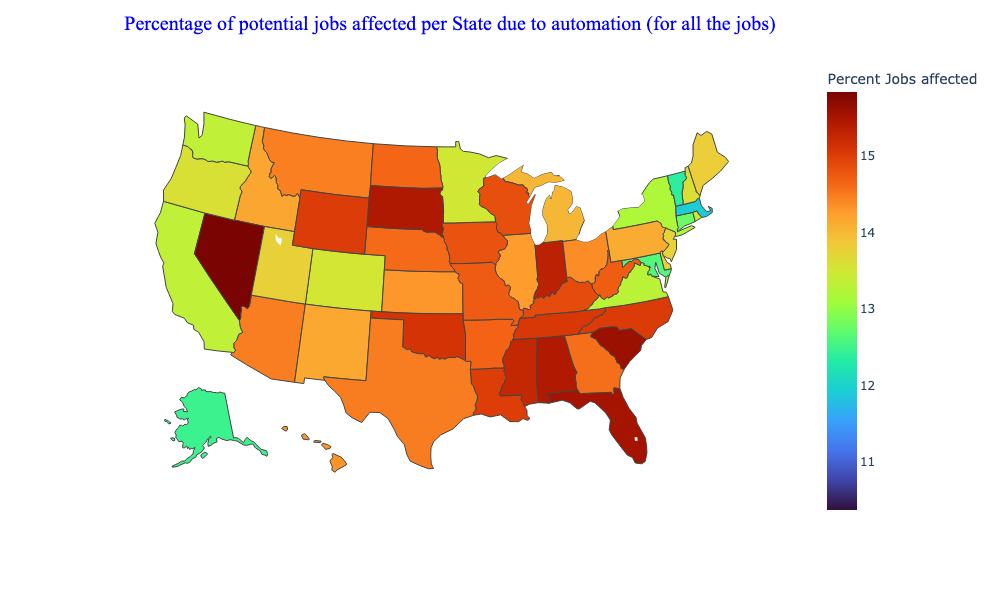

In [48]:
#Above figure won't appear in git. But the following one will.
fig.show(renderer="png",width=1000, height=600)

## Explanation: 
The above map shows percentage wise potential impact of automation on all the jobs for the US states. Among all states Nevada has percentage-wise most impact of automation on the jobs.

## Total Number of potential jobs affected per State

In [49]:
# convert column values from object to numberic type
job_affected_merge_df["Total Jobs"] = pd.to_numeric(job_affected_merge_df["Total Jobs"])
job_affected_merge_df["Jobs Affected"] = pd.to_numeric(job_affected_merge_df["Total Probable Jobs Affected"])

# ploting total jobs affected for each state on map
fig = px.choropleth(job_affected_merge_df,
                    locations='State Code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Jobs Affected',
                    hover_data=['Total Jobs'],
                    color_continuous_scale= "Oryel")
fig.update_layout(
      title_text = 'Total number of potential jobs affected per State (for all jobs)',
      title_font_family="Times New Roman",
      title_font_size = 24,
      title_font_color="black", 
      title_x=0.45)
fig.show()

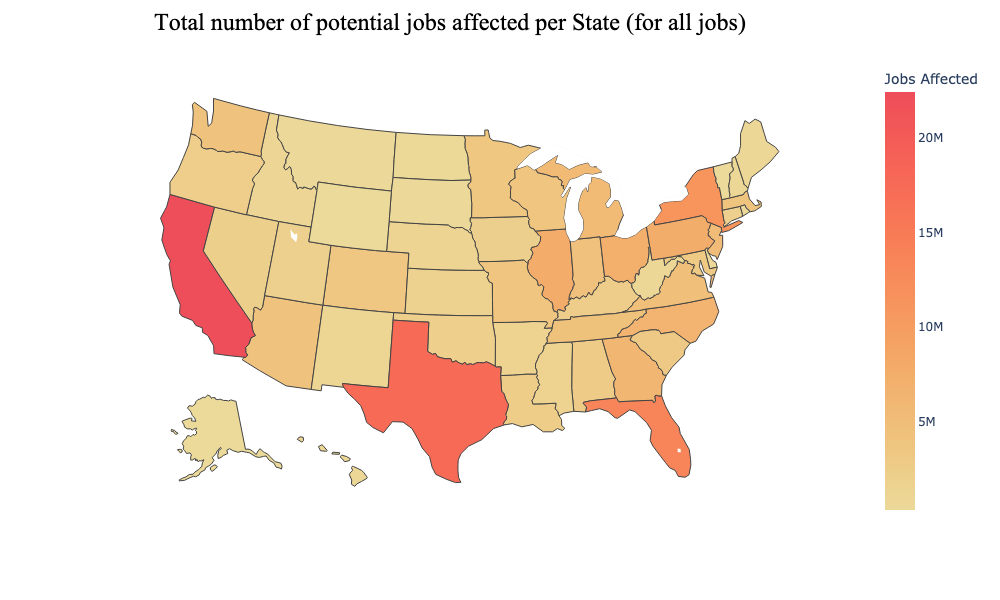

In [50]:
#Above figure won't appear in git. But the following one will.
fig.show(renderer="png",width=1000, height=600)

## Explanation: 
The above map shows total number of potential jobs impacts in the US states. As we can see, California is most impacted among all US states in terms of total number of potential jobs impacted.

## Total jobs impacted among highly affected jobs by automation

In [51]:
# Find those jobs per state that has high probability (>= 0.7) of automation
threshold = 0.7
# Searching for those jobs that has automation probability >= 0.7
affected_job_threshold_df = job_automation_df[job_automation_df['Probability'] >= threshold] 

# finding affected jobs per state for all occupations
affected_job_threshold_state = affected_job_threshold_df.groupby(['State Name','State Code'])['Total Jobs'].sum()
affected_job_threshold_state_df = pd.DataFrame(affected_job_threshold_state).rename(columns={'Total Jobs'
                                                                            :'Affected Jobs'})

# merge with total_jobs_df to get total jobs column
affected_total_merge = total_job_df.merge(affected_job_threshold_state_df, on=['State Name','State Code'])
affected_total_merge.head()

,,Total Jobs,Affected Jobs
State Name,State Code,,
Alabama,AL,18491310,2488550
Alaska,AK,2650100,280650
Arizona,AZ,28246360,3466580
Arkansas,AR,11269720,1431850
California,CA,168114330,19521670


In [52]:
df = pd.DataFrame(affected_total_merge).reset_index()

# convert column values from object to numberic type
df["Total Jobs"] = pd.to_numeric(df["Total Jobs"])
df["Affected Jobs"] = pd.to_numeric(df["Affected Jobs"])

# ploting jobs affected that has high automation probability (greater than 0.7) for each state on map
fig = px.choropleth(df,
                    locations='State Code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Affected Jobs',
                    hover_data=['Total Jobs'],
                    color_continuous_scale="turbid")
fig.update_layout(
      title_text = 'Total probable jobs impacted per State for highly impacted jobs [Probability >= 0.7])',
      title_font_family="Times New Roman",
      title_font_size = 25,
      title_font_color="Black", 
      title_x=0.45)
fig.show()

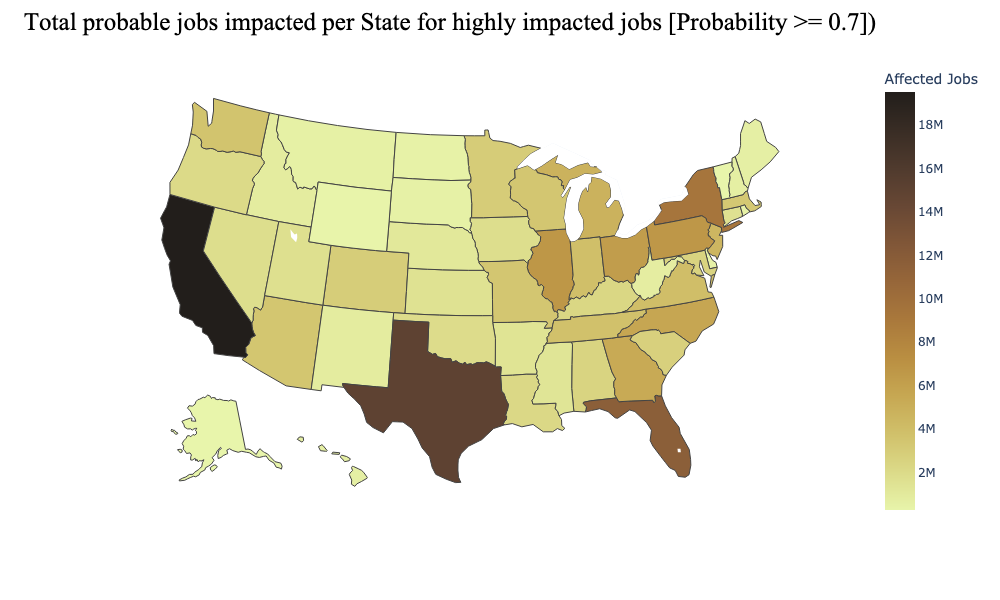

In [53]:
#Above figure won't appear in git. But the following one will.
fig.show(renderer="png",width=1000, height=600)

## Explanation: 
We can see here that among jobs that are highly potentially impacted (probability greater than 0.7), California has the highest number of impacted jobs among all the US states.

## Find highly impacted Job types due to automation

In [54]:
# find percentage impacted
affected_total_merge['Percent Impacted'] = affected_total_merge['Affected Jobs']*100/affected_total_merge['Total Jobs']
affected_total_merge.head()

,,Total Jobs,Affected Jobs,Percent Impacted
State Name,State Code,,,
Alabama,AL,18491310,2488550,13.457943
Alaska,AK,2650100,280650,10.590166
Arizona,AZ,28246360,3466580,12.272661
Arkansas,AR,11269720,1431850,12.705285
California,CA,168114330,19521670,11.612139


In [55]:
probable_job_affected_df.sort_values(by=['Probable Jobs Affected'], ascending = False).head(10)
probable_job_affected_df[probable_job_affected_df['State Name'] == 'California']

,State Name,State Code,2022 National Employment Matrix code,2022 National Employment Matrix title,Total Jobs,Probability,Probable Jobs Affected
4,California,CA,11-1011,Chief Executives,110890,0.0150,1663
55,California,CA,11-1021,General and Operations Managers,869170,0.1600,139067
105,California,CA,11-2011,Advertising and Promotions Managers,10640,0.0390,414
139,California,CA,11-2021,Marketing Managers,172310,0.0140,2412
188,California,CA,11-2022,Sales Managers,329630,0.0130,4285
...,...,...,...,...,...,...,...
24120,California,CA,51-6051,"Sewers, Hand",140,0.9900,138
24131,California,CA,51-6092,Fabric and Apparel Patternmakers,2260,0.0049,11
24142,California,CA,51-9151,Photographic Process Workers and Processing Ma...,1980,0.9900,1960
24161,California,CA,53-7031,Dredge Operators,120,0.9200,110


Total number of Job types in Texas is 268


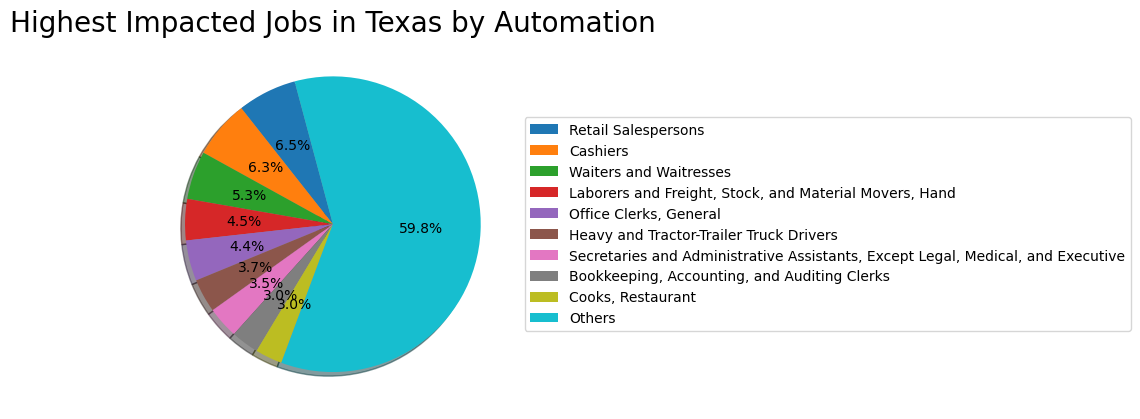

Total number of Job types in California is 272


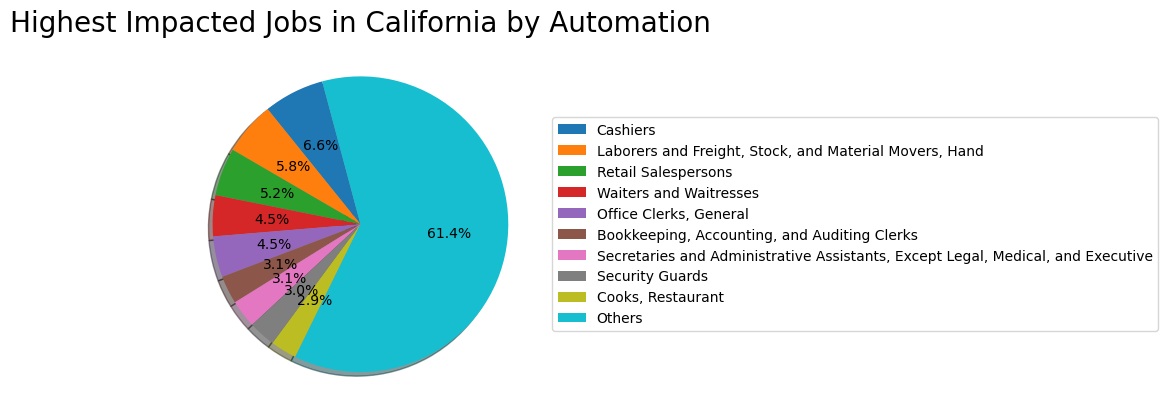

In [56]:
# We found that Texas and California will be highly impacted by automation in terms of total number of jobs.
# In this section, we will draw pie chart to find jobs that are highly impacted in these states.

# Creating list of dictionary to capture state name and state code
highly_impacted_states = [{'state_name':'Texas','state_code':'TX'}, {'state_name':'California','state_code':'CA'}]

for state in highly_impacted_states:
    
    # Find jobs that are highly impacted in the given state
    high_impacted_state_df = probable_job_affected_df.loc[(probable_job_affected_df['Probability'] >= 0.7) 
                                                     & (probable_job_affected_df['State Name'] == state['state_name'])]
    
    # sort occupations based on probable jobs affected
    filtered_and_sorted_df = high_impacted_state_df.sort_values(by=['Probable Jobs Affected'], ascending = False)

    size = len(filtered_and_sorted_df)
    print("Total number of Job types in " + state['state_name'] + " is " +  str(size))
    # find top occupations getting impacted with automation
    top_9_impacted_jobs = filtered_and_sorted_df.head(9)

    # find bottom occupations getting impacted with automation
    bottom_impacted_jobs = filtered_and_sorted_df.tail(size - 9).groupby(['State Name','State Code']).sum()
    bottom_impacted_jobs_df = {'State Name':state['state_name'],'2022 National Employment Matrix code':'', 
                           '2022 National Employment Matrix title':'Others',
                           'Total Jobs':0, 'State Code':state['state_code'], 'Probability':0,
                           'Probable Jobs Affected': 
                               bottom_impacted_jobs['Probable Jobs Affected'][state['state_name']][state['state_code']]}
    
    ## Plot the pie chart
    plot_data = pd.concat([pd.DataFrame(top_9_impacted_jobs), pd.DataFrame(bottom_impacted_jobs_df, index = [0])], 
                      ignore_index = True)
    plt.pie(plot_data['Probable Jobs Affected'],labeldistance = 1.2, startangle=105,autopct='%1.1f%%', shadow=True)
    plt.legend(plot_data['2022 National Employment Matrix title'], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title('Highest Impacted Jobs in '  + state['state_name'] + ' by Automation', fontsize=20)
    plt.show()
    

## Explanation: 
In the above pie-charts we are seeing jobs that are going to be potentially highly impacted by automation for California and Texas (as these 2 states have high number of impacts jobs overall).
We can see the list of job types next to each pie chart showing highly impacted job types. Interestingly, we can notice that for Texas, 9 of the 268 job types constitutes about 40.2% of the total highly impacted jobs in Texas. Similarly, for california 9 out of 272 job types constitues 39.6% of the total highly impacted jobs in Texas. It means that these jobs have very high risk of getting automated and can result in big layoffs.
We can also notice that these are mostly not very high skilled jobs.

## Finding Job types with low automation impact

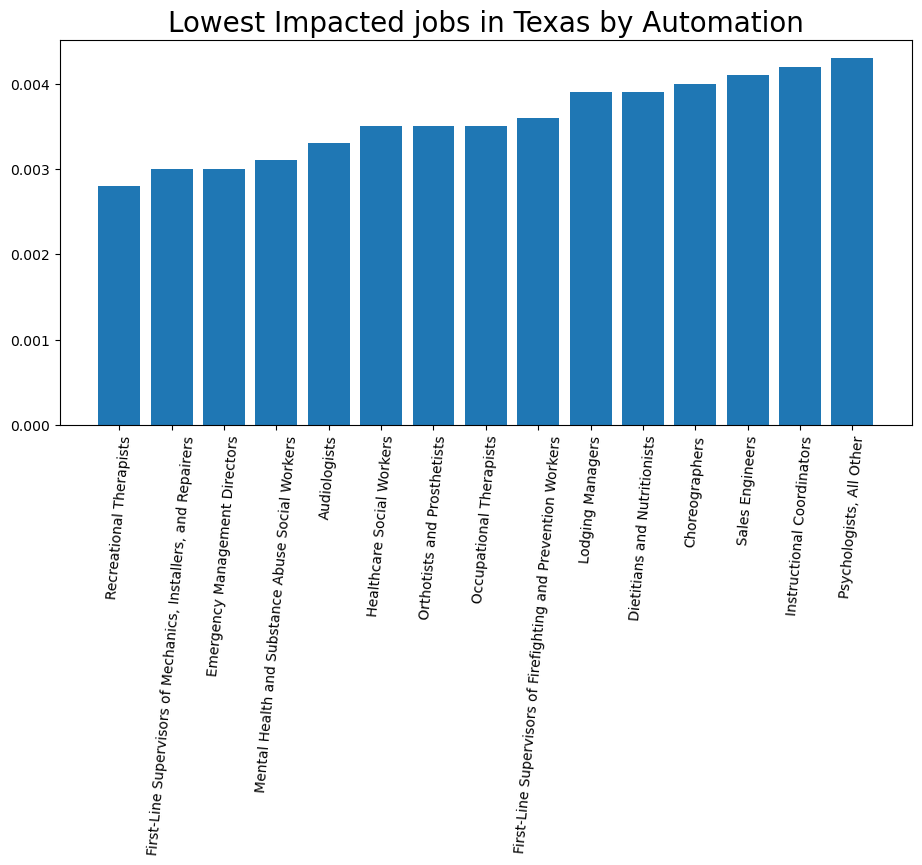

In [57]:
# Determinig 15 job types that have very low probability of automation in Texas

# Findig jobs that has probability of automation lower than or equal to 0.3    
lowest_impacted_jobs = probable_job_affected_df.loc[(probable_job_affected_df['Probability'] <= 0.3) 
                                                     & (probable_job_affected_df['State Name'] == 'Texas')]
# Sorting data to find lowest impacted jobs 
filtered_and_sorted_df = lowest_impacted_jobs.sort_values(by=['Probability'], ascending = True)
# Picking lowest impacted 15 jobs to plot   
lowest_impacted_jobs_df = filtered_and_sorted_df.head(15)
   
plt.figure(figsize=(11,5))
plt.bar(lowest_impacted_jobs_df['2022 National Employment Matrix title'], lowest_impacted_jobs_df['Probability'])
plt.title('Lowest Impacted jobs in Texas by Automation', fontsize=20)
plt.xticks(rotation=85)
plt.show()

## Explanation:
The jobs captured above have very low chances of getting automated (less than 30% chance) For Texas. These seem to be high skill based job types that cannot be easily replaced by machines.

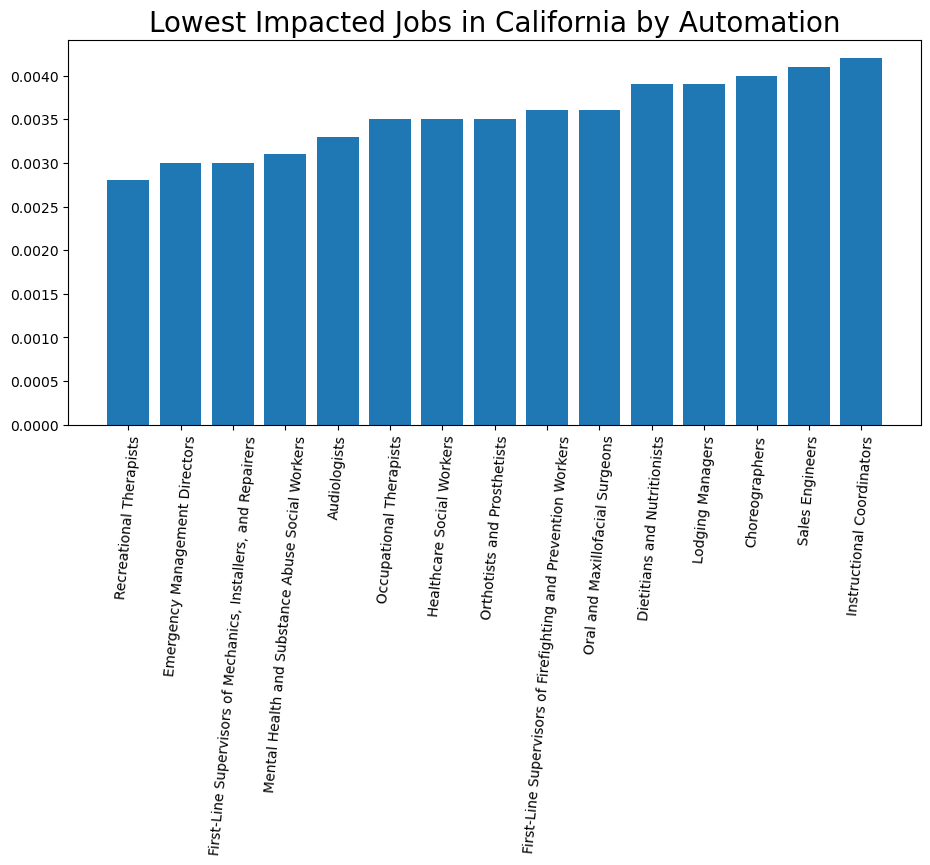

In [58]:
# Determining 15 job types that have very low probability of automation in California

# Findig jobs that has probability of automation lower than or equal to 0.3
lowest_impacted_jobs = probable_job_affected_df.loc[(probable_job_affected_df['Probability'] <= 0.3) 
                                                     & (probable_job_affected_df['State Name'] == 'California')]
# Sorting data to find lowest impacted jobs     
filtered_and_sorted_df = lowest_impacted_jobs.sort_values(by=['Probability'], ascending = True)

# Picking lowest impacted 15 jobs to plot
lowest_impacted_jobs_df = filtered_and_sorted_df.head(15)
    
plt.figure(figsize=(11,5))
plt.bar(lowest_impacted_jobs_df['2022 National Employment Matrix title'], lowest_impacted_jobs_df['Probability'])
plt.title('Lowest Impacted Jobs in California by Automation', fontsize=20)
plt.xticks(rotation=85)
plt.show()

## Explanation :
The jobs captured above have very low chances of getting automated (less than 30% chance) For California. These seem to be high skill based job types that cannot be easily replaced by machines.